# Image Processing SS 20 - Assignment - 08

### Deadline is 17.6.2020 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.data import chelsea
from skimage.color import rgb2gray
from numpy.fft import fft2 as numpy_fft2, ifft2 as numpy_ifft2
import math
from math import pi, e 
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - 2D DCT - 4 Points
Transform a picture with 2D DCT (discrete cosine transform), which you must implement manually using DCT-II.
For the 2D-DCT, perform two 1D-DCT-transformations. Therefore, implement a method which returns a normalized DCT-II
matrix. Plot a normalized 16x16 DCT-II-matrix (with colors reflecting the values in the matrix).

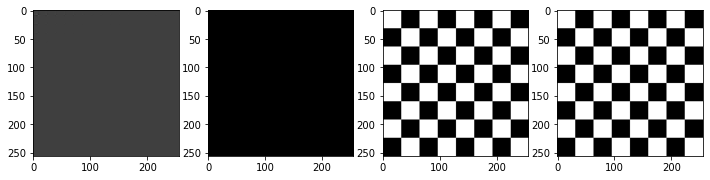

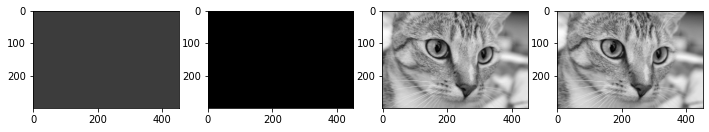

In [11]:
def dct_matrix(N):
    C = np.zeros((N,N))
    for k in range(N):
        for n in range(N):
            C[k,n] = np.cos((np.pi*k*(1/2+n))/N)
    return (1/np.sqrt(N)) * C 

def dct2d(img):
    matrixL = dct_matrix(img.shape[0])
    matrixR = dct_matrix(img.shape[1])
    return matrixL @ img @ matrixR

def inv_dct2d(x):
    """
    Returns the 2d inverse discrete cosine transformation
    """
    matrixL = dct_matrix(x.shape[0])
    matrixR = dct_matrix(x.shape[1])

    return np.linalg.inv(matrixL) @ x  @ np.linalg.inv(matrixR)

def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board



for pic in [chess_board(), rgb2gray(chelsea())/255]:
    plt.subplot(141)
    plt.imshow(np.real(dct2d(pic)) * 200000, cmap='gray')
    plt.subplot(142)
    plt.imshow(np.imag(dct2d(pic)), cmap='gray')
    plt.subplot(143)
    plt.imshow((pic), cmap='gray')
    plt.subplot(144)
    plt.imshow(inv_dct2d(dct2d(pic)), cmap='gray')
    plt.show()

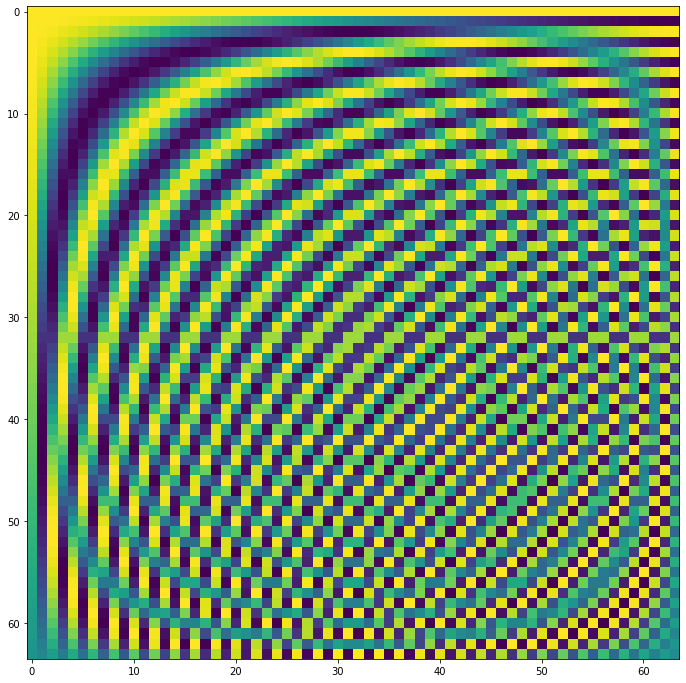

In [4]:
a = dct_matrix(64)
plt.imshow(a)
plt.show()

# Exercise 2 - 1 Point: (Manual calculation, no code needed.)

Given is a signal [5,10,12]. Now you have to mirror the signal as in the lectures (resulting in a signal of length 5) and perform a DFT. Please write down all coefficients in the frequency spectrum. What do you see (one sentence)?

# Exercise 3 - High and Low Pass filter with 2D DCT - 5 Points

Implement the `high_pass` and `low_pass` functions which work on the frequency spectrum of a 2D-DCT
transformed image. Apply the filters to both the chessboard and cat image and transform the
result back into image space.

Show the spectrum before and after filtering as well as the resulting images after backtransformation
into image space.

In [5]:
def high_pass(img_ft, n):
    """Removes the low frequencies"""
    ft = img_ft.copy()
    ft[:n,:n] = 0
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies"""
    ft = img_ft.copy()
    ft[n:,:] = 0
    ft[:,n:] = 0
    return ft
    
def inv_dct_and_plot(img_ft):
    plt.imshow(np.real(inv_dct2d(img_ft)), cmap='gray')
    plt.show()

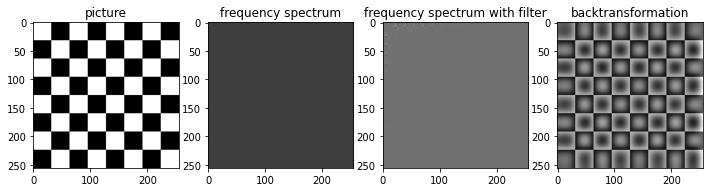

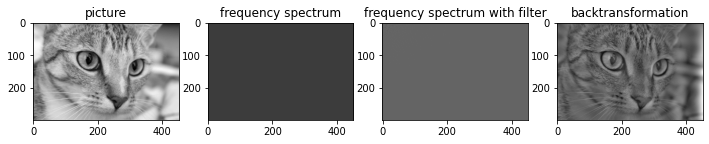

In [6]:
for pic in [chess_board(), rgb2gray(chelsea())/255]:
    ft = dct2d(pic)

    plt.subplot(141)
    plt.title('picture')
    plt.imshow(pic, cmap='gray')
    plt.subplot(142)
    plt.title('frequency spectrum')
    plt.imshow( ft, cmap='gray')
    plt.subplot(143)
    plt.title('frequency spectrum with filter')
    plt.imshow(high_pass(ft,12), cmap='gray')
    plt.subplot(144)
    plt.title('backtransformation')
    plt.imshow(inv_dct2d(high_pass(ft,12)), cmap='gray')
    plt.show()

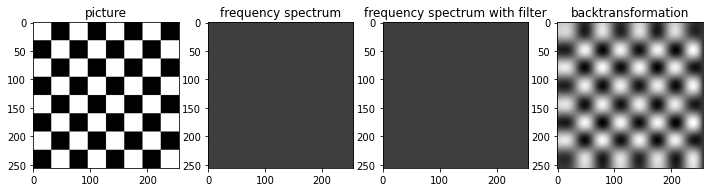

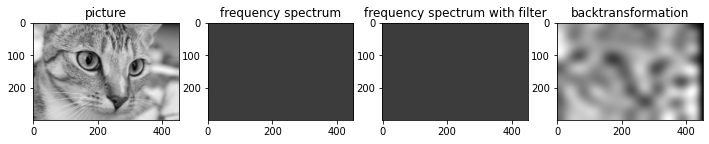

In [7]:
for pic in [chess_board(), rgb2gray(chelsea())/255]:
    ft = dct2d(pic)

    plt.subplot(141)
    plt.title('picture')
    plt.imshow(pic, cmap='gray')
    plt.subplot(142)
    plt.title('frequency spectrum')
    plt.imshow( ft, cmap='gray')
    plt.subplot(143)
    plt.title('frequency spectrum with filter')
    plt.imshow(low_pass(ft,12), cmap='gray')
    plt.subplot(144)
    plt.title('backtransformation')
    plt.imshow(inv_dct2d(low_pass(ft,12)), cmap='gray')
    plt.show()